In [ ]:
# WRSeg 2020 - https://github.com/alexcamargoweb/wrseg-2020
# Repositório do minicurso: Fake News - Conceitos, métodos e aplicações de identificação e mitigação.
# Notebook de configuração e execução do git via Colab/GitHub
# Arquivo: train_wrseg-2020.ipynb

### Etapa 1: Importação das bibliotecas


In [ ]:
# Importação das bibliotecas
import numpy as np # manipulação de matrizes
import math # funções matemáticas básicas
import pandas as pd # carregamento e manipulação da base de dados
from google.colab import drive # acessar recursos do Drive
import seaborn as sns # visualização de gráficos
import spacy as sp # processamento de linguagem natural (pré-processamento)
import string # funções de pré-processamento
import random # geração de números aleatórios
import matplotlib.pyplot as plt # geração de gráficos
from sklearn.model_selection import train_test_split # separa os dados de treino e teste
from sklearn.metrics import confusion_matrix # cria a matriz de confusão (avaliação)
import tensorflow  # principal biblioteca de ML
from tensorflow.keras import layers # camadas da rede
from tensorflow.keras.preprocessing.sequence import pad_sequences # preenchimento de palavras
import tensorflow_datasets as tfds # constrói os datasets
import warnings # ignora os warnings dos outputs
warnings.filterwarnings('ignore')

### Etapa 2: Pré-processamento dos dados


In [91]:
# Monta o Drive
drive.mount("/content/drive") 

Mounted at /content/drive


In [ ]:
 # Nomeia as colunas a serem utilizadas
colunas = ['classe', 'noticia']

In [ ]:
# Carrega o dataset (Fake.br-Corpus by @roneysco)
dataset = pd.read_csv('/content/drive/MyDrive/wrseg-2020/datasets/noticias.csv', 
                   header = None,
                   names = colunas,
                   engine = 'python', 
                   encoding = 'utf-8') 

In [ ]:
# Verifica a quantidade de registros
dataset.shape

(7200, 2)

In [ ]:
# Verifica os valores únicos das classes
dataset.classe.unique()

array(['fake', 'true'], dtype=object)

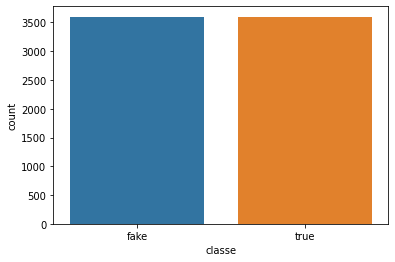

In [ ]:
# Plota a distribuição das classes (fake, true)
sns.countplot(dataset.classe);

In [ ]:
# Mostra os primeiros 5 registros
dataset.head()

,classe,noticia
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [ ]:
# Mostra os últimos 5 registros
dataset.tail()

,classe,noticia
7195,true,jornal britanico acao contra lula lava jato se...
7196,true,temer diz acionou pf cade investigar aumentos ...
7197,true,obstaculos politicos temer especialistas ouvid...
7198,true,setembro boa noite aqui estao principais notic...
7199,true,envolvo politica diz brasileiro preso venezuel...


In [ ]:
# Armazena as notícias utilizadas no treinamento
noticias = dataset.iloc[:, 1].values 
# NumPy array
noticias.shape
type(noticias)

numpy.ndarray

In [ ]:
# Armazena as classes das notícias utilizadas para o treinamento (fake, true)
classes = dataset.iloc[:, 0].values 
# NumPy array
classes.shape
type(classes)

numpy.ndarray

In [ ]:
# Verifica a quantidade de registros em cada classe (tototal 7200)
unicos, quantidades = np.unique(classes, return_counts=True)
print(unicos, quantidades)

['fake' 'true'] [3600 3600]


In [ ]:
# Converte as classes das notícias em 1 e 0 (saída)
classes[classes == 'true'] = 1
classes[classes == 'fake'] = 0
print(classes)

[0 0 0 ... 1 1 1]


In [ ]:
# Verifica novamente as classes
np.unique(classes)

array([0, 1], dtype=object)

In [ ]:
# Codifica o dataset inteiro (tensorflow)... pausa para umas perguntas :)
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(noticias, 
                                                                      target_vocab_size=70000)
# Verifica o tamanho do vocabulário atual
tokenizer.vocab_size

67671

In [ ]:
# Um exemplo de codificação
ids = tokenizer.encode('o presidente disse')
print(ids)

# Um exemplo de decodificação
texto = tokenizer.decode(ids)
print(texto)

[508, 6, 5957]
o presidente disse


In [ ]:
# Visualiza as palavras únicas
print(tokenizer.subwords)

['nao_', 'lula_', 'ser_', 'sao_', 'tambem_', 'presidente_', 'disse_', 'sobre_', 'anos_', 'ja_', 'federal_', 'governo_', 'ainda_', 'r_', 'segundo_', 'brasil_', 'temer_', 'ate_', 'pais_', 'ha_', 'ter_', 'diz_', 'contra_', 'pessoas_', 'dia_', 'pode_', 'vai_', 'ano_', 'apos_', 'caso_', 'afirmou_', 'ministro_', 'justica_', 'estado_', 'porque_', 'milhoes_', 'acordo_', 'publico_', 'lava_', 'dilma_', 'policia_', 'jato_', 'paulo_', 'dois_', 'so_', 'defesa_', 'estao_', 'dinheiro_', 'fazer_', 'ministerio_', 'processo_', 'durante_', 'voce_', 'todos_', 'mil_', 'hoje_', 'rio_', 'casa_', 'outros_', 'operacao_', 'parte_', 'odebrecht_', 'nesta_', 'decisao_', 'alem_', 'tribunal_', 'sera_', 'republica_', 'pt_', 'onde_', 'juiz_', 'prisao_', 'empresa_', 'camara_', 'desde_', 'politica_', 'stf_', 'qualquer_', 'entao_', 'corrupcao_', 'moro_', 'agora_', 'grande_', 'seguranca_', 'grupo_', 'vez_', 'antes_', 'norte_', 'apenas_', 'dias_', 'mundo_', 'coreia_', 'tres_', 'nacional_', 'maior_', 'tudo_', 'conta_', 'mom

In [ ]:
# Aplica a tokenização (recebe um texto e retorna os ids)
noticias = [tokenizer.encode(noticia) for noticia in noticias]

In [ ]:
# Seleciona uma amostra (somente para visualização)
for _ in range(5):
  print(noticias[random.randint(0, len(noticias) - 1)])

[175, 3837, 20871, 52, 2466, 976, 55944, 529, 9, 204, 3, 10460, 736, 426, 819, 9, 4874, 1, 3135, 175, 9, 736, 29, 3, 20871, 976, 63, 55944, 395, 37, 41, 188, 2912, 5714, 529, 3732, 1347, 819, 9, 52, 2466, 502, 9519, 175, 143, 8226, 14931, 184, 6423, 809, 4874, 200, 13, 15, 41, 529, 204, 3, 10460, 540, 1319, 5870, 2253, 6412, 1, 5196, 5032, 736, 861, 30, 2048, 1276, 819, 1, 60132, 67512]
[17, 22, 4651, 3979, 5151, 278, 121, 62, 249, 464, 8004, 279, 268, 638, 6, 2513, 1, 97, 83, 253, 278, 18460, 6051, 228, 94, 5, 800, 206, 1, 7594, 1626, 11406, 376, 6, 68, 129, 17, 198, 7, 249, 464, 6733, 279, 638, 15375, 3979, 422, 648, 474, 272, 161, 1845, 571, 62, 53, 1001, 648, 813, 82, 45671, 813, 53, 530, 109, 228, 53, 53, 1001, 2981, 53, 5214, 31, 17, 8, 272, 161, 1845, 62, 3979, 3066, 35810, 3979, 1, 2532, 1559, 3979, 278, 2991, 5151, 4043, 35, 266, 5646, 119, 8738, 6, 1307, 833, 843, 44, 1284, 2213, 571, 62, 41434, 61101, 8128, 2280, 1, 26, 3, 855, 189, 1, 6402, 52, 1010, 321, 249, 17, 2027, 1, 

In [ ]:
# Padding: preenche as notícias, deixando todas com o mesmo tamanho

# Percorre as notícias e verifica a que tem o maior tamanho em palavras
max_len = max([len(noticia) for noticia in noticias])
print(max_len)

4324


In [ ]:
# Realiza o preenchimento
noticias = pad_sequences(noticias,
                         value = 0, 
                         padding = 'post', 
                         maxlen = max_len) 

In [ ]:
# Seleciona uma amostra (somente para visualização)
for _ in range(5):
  print(noticias[random.randint(0, len(noticias) - 1)])

[  27 2038    2 ...    0    0    0]
[ 1597 18220  3108 ...     0     0     0]
[ 198 1088 8852 ...    0    0    0]
[2288  711 2828 ...    0    0    0]
[ 428  428 2195 ...    0    0    0]


In [ ]:
# Divide as bases de treinamento e teste 
X_train, X_test, Y_train, Y_test = train_test_split(noticias, classes, 
                                                    test_size = 0.20, 
                                                    stratify = classes) # classes balanceadas
# Verifica a divisão dos dados

# Treinamento
print(X_train.shape) # noticia
print(Y_train.shape) # classe

# Teste
print(X_test.shape) # noticia
print(Y_test.shape) # classe

# Seleciona uma notícia (apenas para visualização)
print(X_train[0])

(5760, 4324)
(5760,)
(1440, 4324)
(1440,)
[2065  483 1480 ...    0    0    0]


### Etapa 3: Construção do modelo


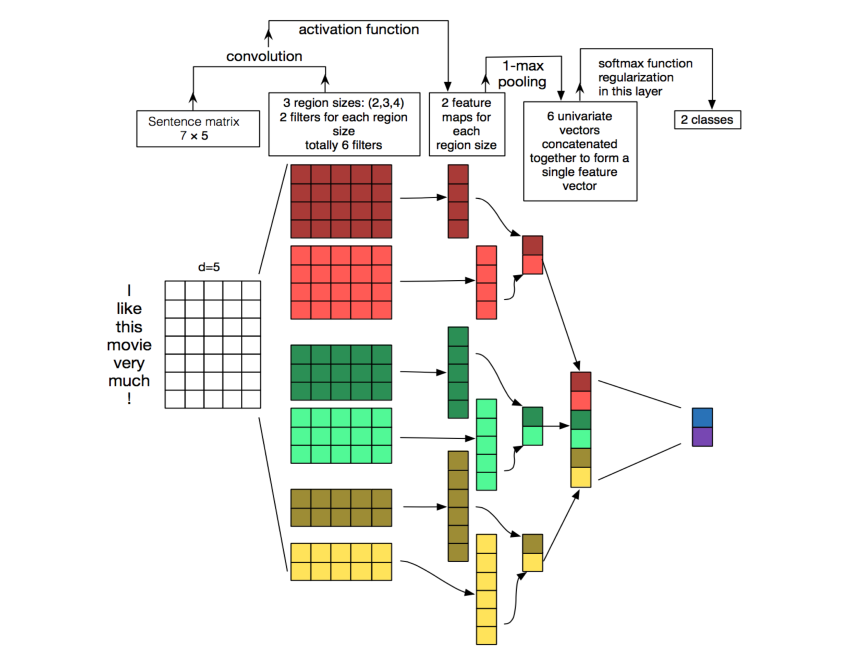

In [ ]:
# Imagem conceitual
from IPython.display import Image
Image(filename="/content/drive/MyDrive/wrseg-2020/pictures/dcnn.png")

In [ ]:
# Construção baseada na classe Model do keras

class DCNN(tensorflow.keras.Model):

  def __init__(self, # cria uma instância referenciando a um objeto
               vocab_size, # tamanho do vocabulário
               emb_dim = 128, # tamanho da matriz de embeddings (default)
               nb_filters = 50, # quantidade de filtros (2 filtros para cada dimensão)
               ffn_units = 512, # neurônios - feed forward network (rede densa)
               nb_classes = 2, # quantidade de classes (0, 1)
               dropout_rate = 0.1, # evita o overfitting, zera 10% neurônios
               training = False,
               name = "dcnn"):
    # Chama o método construtor da classe Model (cria um novo modelo)
    super(DCNN, self).__init__(name=name)
    
    # Define as camadas

    # Camada 1
    # Gera as matrizes de embedding (4324 colunas e 128 linhas)
    self.embedding = layers.Embedding(vocab_size, emb_dim)

    # Camada 2 (retorna um vetor)
    # Gera os filtros (ref. na figura amarelo)
    self.bigram = layers.Conv1D(filters = nb_filters, 
                                kernel_size = 2, # bigram: 2 linhas
                                padding = 'same', # retorna no mesmo formato
                                activation = 'relu') 
    # Gera os filtros (ref. na figura verde)
    self.trigram = layers.Conv1D(filters = nb_filters, 
                                 kernel_size = 3, # trigram: 3 linhas
                                 padding = 'same', 
                                 activation = 'relu')
    # Gera os filtros (ref. na figura vermelho)
    self.fourgram = layers.Conv1D(filters = nb_filters, 
                                  kernel_size = 4, # fourgram: 4 linhas
                                  padding = 'same', 
                                  activation = 'relu')
    
    # Camada 3
    # Gera o pooling (valor mais expressivo): uma camada extrai a informação dos filtros
    self.pool = layers.GlobalMaxPool1D() # uma dimensão

    # Camada 4 (camadas densas)
    # Camada de entrada
    self.dense_1 = layers.Dense(units = ffn_units, # primeira camada oculta: 512 neurônios
                                activation = 'relu')
    # Zera alguns neurônios (10%) - evita o overfitting
    self.dropout = layers.Dropout(rate = dropout_rate)
    # Camada de saída
    self.last_dense = layers.Dense(units = 1, # dois neurônios, uma saída (0 ou 1)
                                   activation = 'sigmoid') # retorna uma probilidade

  # Define uma função para conectar as camadas da rede (não sequencial)
  def call(self, inputs, training):
    x = self.embedding(inputs) # embedding é um objeto que recebe as notícias
    x_1 = self.bigram(x) # liga a matriz de embedding
    x_1 = self.pool(x_1) # liga a aplicação do filtro com a camda de pooling
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2) 
    x_3 = self.fourgram(x) 
    x_3 = self.pool(x_3)

    # Realiza a junção de tudo (CNN flattening)
    merged = tensorflow.concat([x_1, x_2, x_3], axis = -1) # axis indefinido: (batch_size, 3 * nb_filters)
    merged = self.dense_1(merged) # concatena os dados com a RNA densa (primeira camada)
    merged = self.dropout(merged, training) # zera uma porção de neurônios
    output = self.last_dense(merged) # camada de saída

    return output

### Etapa 4: Treinamento do modelo


In [ ]:
# Parâmetros da rede neural (podem ser usados os valores default da classe)
# Importante: é aconselhável fazer um tuning destes parâmetros

vocab_size = tokenizer.vocab_size # vocabulário
emb_dim = 200 # matriz de embeddings
nb_filters = 100 # filtros
ffn_units = 256 # neurônios na camada escondida (densa)
batch_size = 64 # tamanho da amostra de atualização
nb_classes = len(set(Y_train)) # quantidade de classes (somente para visualização)
print(nb_classes)
dropout_rate = 0.2 # inativa 20% dos neurônios
nb_epochs = 3 # épocas de treinamento

2


In [ ]:
# Execução do treinamento

# Cria um objeto Dcnn para instanciar a classe DCNN
Dcnn = DCNN(vocab_size = vocab_size, 
            emb_dim = emb_dim, 
            nb_filters = nb_filters,
            ffn_units = ffn_units, 
            nb_classes = nb_classes, 
            dropout_rate = dropout_rate)

# Compila a rede
Dcnn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Checkpoint: salva o modelo ou restaura a última sessão
checkpoint_path = "/content/drive/MyDrive/wrseg-2020/checkpoints"
checkpoint_name = "ckp_wrseg-2020"
# Passa o objeto a ser salvo
ckpt = tf.train.Checkpoint(Dcnn = Dcnn)
# Mantém os últimos 5 modelos salvos
ckpt_manager = tf.train.CheckpointManager(ckpt, 
                                          checkpoint_path, 
                                          checkpoint_name = checkpoint_name,
                                          max_to_keep = 5)
# Acessa o último checkpoint (se existir)
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Checkpoint restaurado com sucesso!')

In [ ]:
# Conversão do tipo de dados para long antes de executar o treinamento

X_train = X_train.astype(np.int64)
Y_train = Y_train.astype(np.int64)
X_test  = X_test.astype(np.int64)
Y_test  = Y_test.astype(np.int64)

In [ ]:
# Realiza o treinamento em si no dataset
history = Dcnn.fit(X_train, Y_train,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10) # cria uma base de dados de validação

# Salva o checkpoint final
ckpt_manager.save()

Epoch 1/3
81/81 [==============================] - 29s 356ms/step - loss: 0.3167 - accuracy: 0.8756 - val_loss: 0.1319 - val_accuracy: 0.9514
Epoch 2/3
81/81 [==============================] - 29s 354ms/step - loss: 0.0513 - accuracy: 0.9809 - val_loss: 0.1324 - val_accuracy: 0.9514
Epoch 3/3
81/81 [==============================] - 29s 358ms/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.1578 - val_accuracy: 0.9462


'/content/drive/MyDrive/wrseg-2020/checkpoints/ckp_wrseg-2020-1'

### Etapa 5: Avaliação do modelo

In [ ]:
# Avalia o conjunto de testes (depois do modelo ser treinado)
results = Dcnn.evaluate(X_test, Y_test, batch_size = batch_size)
print(results) # loss e accuracy

23/23 [==============================] - 2s 91ms/step - loss: 0.1146 - accuracy: 0.9576
[0.11461366713047028, 0.9576388597488403]


In [ ]:
# Armazena as predições realizadas no conjunto de testes
Y_test_pred = Dcnn.predict(X_test)


In [ ]:
# Tamanho do conjunto de testes predito (somente para visualização)
print(Y_test_pred.size)
# Predições para cada uma das classes (probabilidade em %)
print(Y_test_pred)

1440
[[9.9995911e-01]
 [1.7784471e-02]
 [1.4136603e-05]
 ...
 [2.5101108e-04]
 [1.2813507e-01]
 [1.6080168e-04]]


In [ ]:
# Define um limiar para a classificação: true, false (50%)
Y_test_pred = (Y_test_pred > 0.5)
print(Y_test_pred)

[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
# Respostas corretas do conjunto de teste
print(Y_test)

[1 0 0 ... 0 0 0]


In [ ]:
# Cria a matriz de confusão: repostas corretas e as previsões
cm = confusion_matrix(Y_test, Y_test_pred)
print(cm) # na diagonal principal estão os acertos para cada classe

[[709  11]
 [ 50 670]]


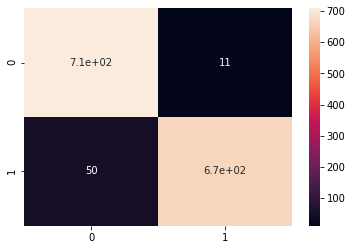

In [ ]:
# Gera a matriz graficamente
sns.heatmap(cm, annot = True)

In [ ]:
# Geração dos gráficos de treinamento

# Atributos disponíveis
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

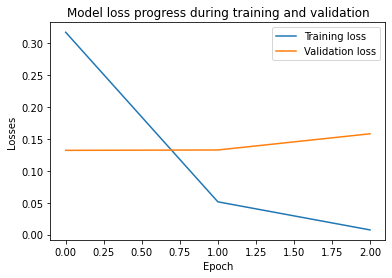

In [ ]:
# Gráfico da função de perda (quanto menor, melhor)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

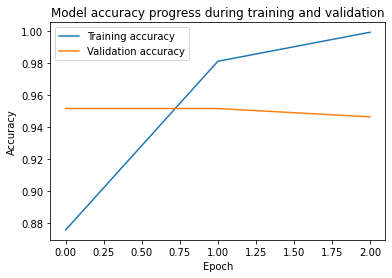

In [ ]:
# Gráfico da acurácia (quanto maior, melhor)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

### Bônus: Classificação de novos textos

In [ ]:
# Texto de exemplo
text = 'To com esse video aqui de uma ARMAcaoO CRUEL E DESUMANA que fizeram hoje com o candidato Dada na sede do partido'
# Realiza a tokenização
text = tokenizer.encode(text)
print(text)

[67499, 508, 63230, 22429, 205, 138, 8128, 37323, 67480, 67497, 67492, 67480, 8577, 67494, 67447, 67482, 67497, 67500, 67484, 67491, 67447, 67484, 67447, 67483, 67484, 67498, 67500, 67492, 67480, 67493, 67480, 67447, 11887, 891, 56, 63230, 508, 357, 67483, 5442, 4771, 710, 1527, 16429]


In [ ]:
# Converte o texto, indica que não está realizando o treinamento e retorna uma probabilidade
pred = Dcnn(np.array([text]), training = False).numpy()
pred = (pred > 0.5)
print(pred)


[[False]]
